# Exploratory Data Analysis (EDA) of Bengaluru Housing Dataset

## Introduction

Exploratory Data Analysis (EDA) is performed to understand patterns,
relationships, and important factors affecting housing prices in Bengaluru.

Objectives of this project:

- Understand dataset structure
- Clean missing data
- Analyze price distribution
- Study relationship between house features and price
- Identify location-based price differences

EDA helps transform raw data into meaningful insights before building predictive models.


## Loading the Dataset

The dataset contains information about residential properties such as
location, size, number of bathrooms, balconies, and price.


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


In [3]:
df = pd.read_csv(r"C:\Users\yuvar\Downloads\Module 2 Bengaluru_House_Data.csv")
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Understanding

Before analysis, we explore dataset dimensions, data types,
and statistical properties.


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.shape


(13320, 9)

In [7]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
# Remove unnecessary column
df = df.drop(columns=['society'])

# Fill missing values
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())
df['location'] = df['location'].fillna(df['location'].mode()[0])

# Drop rows missing critical info
df = df.dropna(subset=['size', 'total_sqft'])

In [9]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [10]:
#create bhk coloumn
df['BHK'] = df['size'].apply(
    lambda x: int(x.split(' ')[0]) if isinstance(x, str) else np.nan
)


In [11]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')


In [12]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())
#missing values sqft values to median

## Price Distribution Analysis

This visualization shows how house prices are distributed across
properties in Bengaluru. The histogram displays the frequency of
houses within different price ranges, while the KDE curve represents
the overall trend of price distribution.


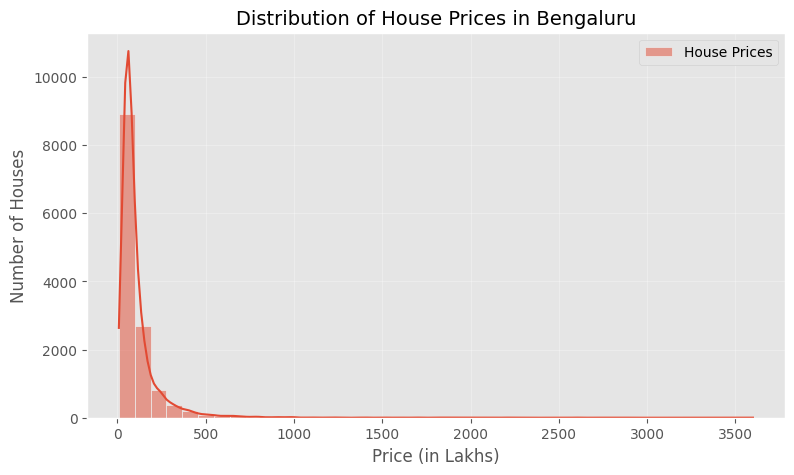

In [13]:
plt.figure(figsize=(9,5))

sns.histplot(
    df['price'],
    bins=40,
    kde=True,
    label="House Prices"
)

plt.title("Distribution of House Prices in Bengaluru", fontsize=14)
plt.xlabel("Price (in Lakhs)", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)

plt.legend()
plt.grid(alpha=0.3)

plt.show()


**Insight:**

- Most houses fall within lower and mid price ranges.
- The distribution is right-skewed, indicating a small number
  of luxury properties with very high prices.


## Distribution of Houses by BHK

This chart shows the number of properties available for each
BHK (Bedroom-Hall-Kitchen) category.


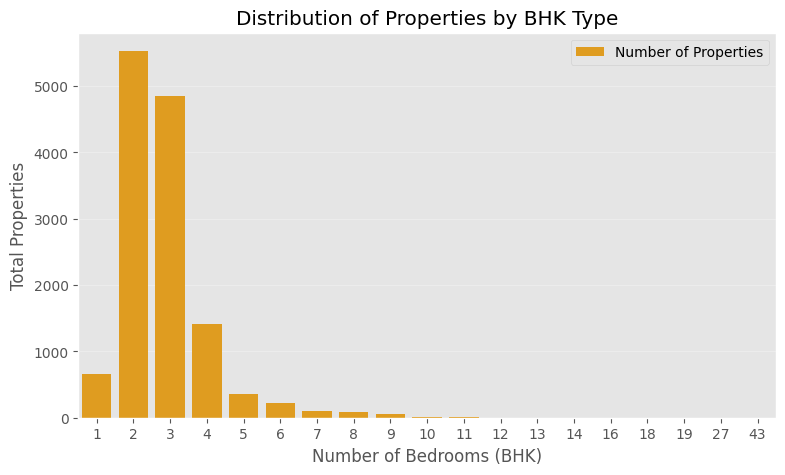

In [14]:
plt.figure(figsize=(9,5))

sns.countplot(
    x='BHK',
    data=df,
    color='orange',
    label="Number of Properties"
)

plt.title("Distribution of Properties by BHK Type")
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Total Properties")

plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()


**Insight:**

- 2BHK and 3BHK houses dominate the Bengaluru housing market.
- Very high BHK categories are comparatively rare.


## Relationship Between Property Area and Price

This scatter plot illustrates how property size influences
housing price.



Area vs price


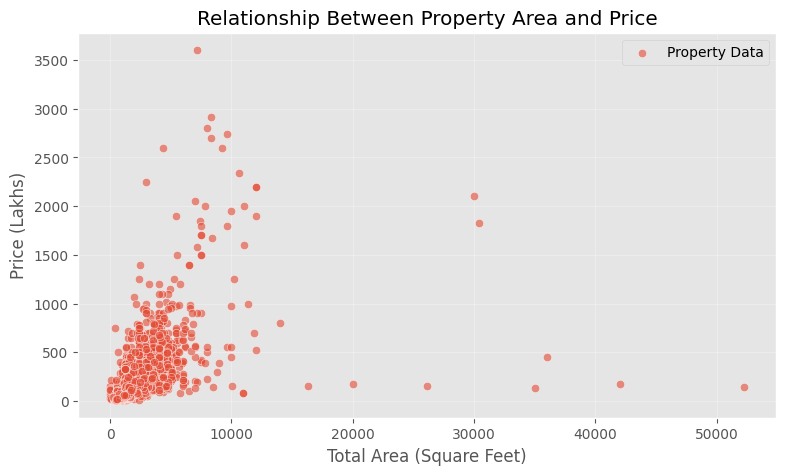

In [15]:
plt.figure(figsize=(9,5))

sns.scatterplot(
    x='total_sqft',
    y='price',
    data=df,
    alpha=0.6,
    label="Property Data"
)

plt.title("Relationship Between Property Area and Price")
plt.xlabel("Total Area (Square Feet)")
plt.ylabel("Price (Lakhs)")

plt.legend()
plt.grid(alpha=0.3)

plt.show()


**Insight:**

- Price generally increases as total square footage increases.
- This indicates a positive relationship between property size
  and housing price.


## Price Variation Across BHK Categories

This boxplot compares price distributions across different
BHK categories.


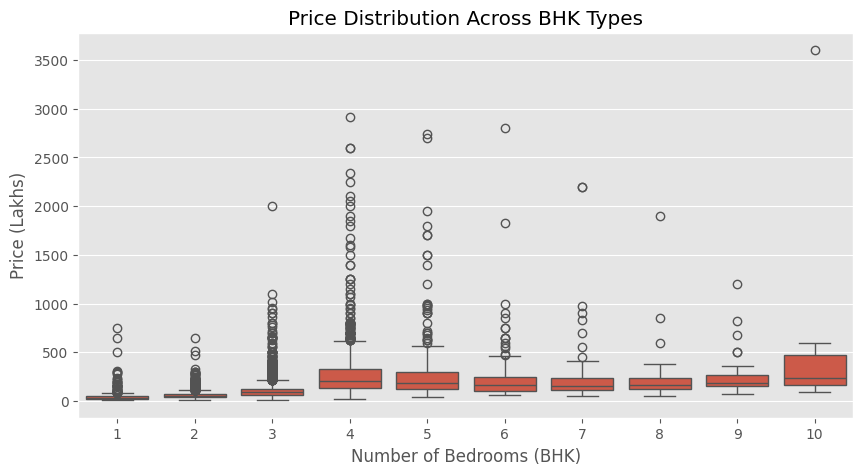

In [16]:
df_filtered = df[df['BHK'] <= 10]

plt.figure(figsize=(10,5))
sns.boxplot(x='BHK', y='price', data=df_filtered)

plt.title("Price Distribution Across BHK Types")
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Price (Lakhs)")

plt.show()


**Insight:**

- Higher BHK properties tend to have higher median prices.
- Price variation exists within each category due to
  location and amenities.


## Top Locations by Property Listings

This visualization shows locations with the highest number
of property listings.


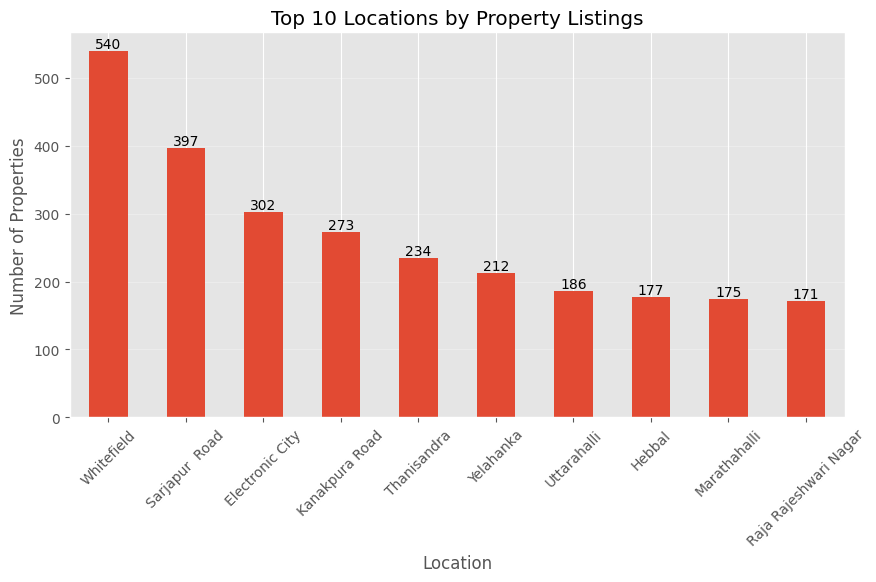

In [17]:
plt.figure(figsize=(10,5))

ax = df['location'].value_counts().head(10).plot(kind='bar')

plt.title("Top 10 Locations by Property Listings")
plt.xlabel("Location")
plt.ylabel("Number of Properties")

# ✅ Show numbers on bars (simple)
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()


**Insight:**

- Certain locations have significantly higher property listings,
  indicating popular residential zones.


## Average Price by Location

This chart highlights locations with the highest average
housing prices.


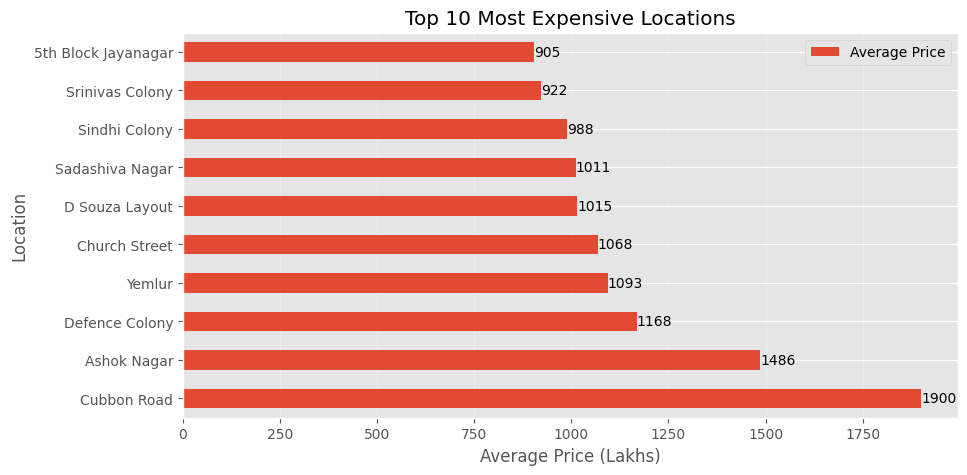

In [18]:
plt.figure(figsize=(10,5))

ax = df.groupby('location')['price'].mean()\
    .sort_values(ascending=False)\
    .head(10)\
    .plot(kind='barh', label="Average Price")

plt.title("Top 10 Most Expensive Locations")
plt.xlabel("Average Price (Lakhs)")
plt.ylabel("Location")

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')

plt.legend()
plt.grid(axis='x', alpha=0.3)

plt.show()


**Insight:**

- Housing prices vary significantly across locations.
- Location is one of the strongest factors affecting price.


## Correlation Analysis

Correlation analysis helps identify relationships between
numerical housing features.


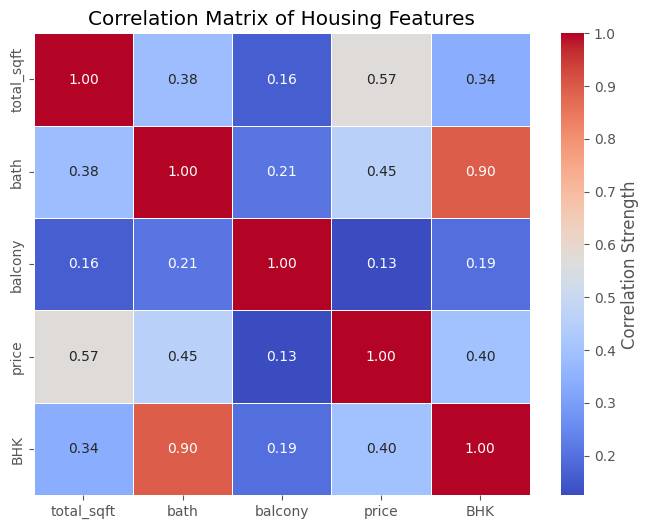

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Strength'}
)

plt.title("Correlation Matrix of Housing Features")
plt.show()

**Insight:**

- Price shows strong correlation with total square feet
  and number of bathrooms.
- These variables are key indicators of property value.


## Key Insights

- Property **location** has a strong influence on housing prices,
  with premium areas showing significantly higher average prices.

- Larger properties measured by **total square footage**
  generally command higher prices.

- **2BHK and 3BHK** homes represent the majority of listings,
  indicating common housing preferences in Bengaluru.

- The number of **bathrooms** and


## Conclusion

This Exploratory Data Analysis (EDA) provided meaningful insights into
the Bengaluru housing market by examining relationships between property
features and pricing.

Missing values were handled carefully to preserve maximum data while
maintaining data quality and analytical reliability.

The analysis demonstrates that **location, property size, and number of
bedrooms/bathrooms** are the primary factors influencing housing prices.
These findings can help buyers, investors, and analysts better understand
market trends and make informed decisions.
